In [72]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv

import os
import shutil as sh

### Test sur un ensemble d'images

In [62]:
mypath = "./spiral/training/parkinson/"
mesimages = os.listdir(mypath)
images_path = [os.path.join(mypath,x) for x in mesimages]

In [81]:
list_images_final = list()
for path in images_path :
    test_image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2GRAY)
    histo_test = cv.calcHist([test_image], channels=[0], mask=None,histSize=[256], ranges=[0, 256])
    hist_argmax = histo_test.argmax()
    test_image2 = test_image.copy()
    test_image_filtre1 = test_image2>hist_argmax-30
    test_image_filtre2 = test_image2<=hist_argmax-30
    test_image[~test_image_filtre1] = 0
    test_image[~test_image_filtre2] = 255
    list_images_final.append(test_image)

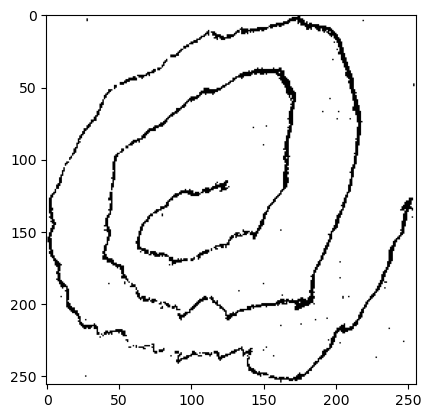

In [83]:
plt.figure()
plt.imshow(list_images_final[7], cmap='gray')
plt.show()

## Modèle 1 : 4 classes

### Préparation du jeux de données

In [79]:
def create_dataset1(source_dir, dest_dir) :
    myfolder = os.listdir(source_dir)
    for folder in myfolder : 
        path2 = os.path.join(source_dir,folder)
        classes = os.listdir(path2)
        for classe in classes : 
            path3 = os.path.join(path2,classe)
            myimages = os.listdir(path3)
            myclass = source_dir+"_"+classe
            for image in myimages : 
                all_path = os.path.join(path3,image)
                path_dest1 = os.path.join(dest_dir,folder)
                path_dest_final = os.path.join(path_dest1,myclass)
                if not os.path.isdir(path_dest_final) : 
                    os.makedirs(path_dest_final) # si il n'existe pas il le crée
                sh.copy(all_path, path_dest_final)

In [80]:
spiral_path = "spiral"
wave_path = "wave"
dest_path = "Dataset1"
create_dataset1(spiral_path,dest_path)
create_dataset1(wave_path,dest_path)

### Chargement et binarisation des images

In [84]:
def loadimages(source_dir) :
    myimages = list()
    mylabels = list()
    myclasses = os.listdir(source_dir)
    for classe in myclasses :
        mypath = os.path.join(source_dir,classe)
        mesimages = os.listdir(mypath)
        images_path = [os.path.join(mypath,x) for x in mesimages]
        for path in images_path :
            test_image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2GRAY)
            histo_test = cv.calcHist([test_image], channels=[0], mask=None,histSize=[256], ranges=[0, 256])
            hist_argmax = histo_test.argmax()
            test_image2 = test_image.copy()
            test_image_filtre1 = test_image2>hist_argmax-30
            test_image_filtre2 = test_image2<=hist_argmax-30
            test_image[~test_image_filtre1] = 0
            test_image[~test_image_filtre2] = 255
            myimages.append(test_image)
            mylabels.append(classe)
    return myimages, mylabels

In [85]:
train_path = "./Dataset1/training/"
test_path = "./Dataset1/testing/"
train_images, train_labels = loadimages(train_path)
test_images, test_labels = loadimages(test_path)

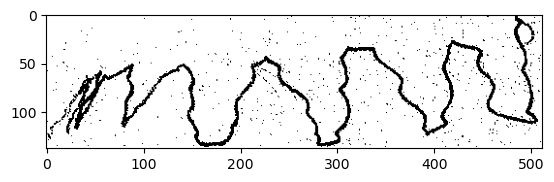

In [92]:
plt.imshow(train_images[140], cmap="gray")
plt.show()

### HoG

### Classifieur